In [1]:
import pandas as pd 
import numpy as np
import sklearn 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib

In [2]:
data = pd.read_csv('data/data_concelhos_new.csv')

In [3]:
data

,data,concelho,confirmados_14,confirmados_1,incidencia,incidencia_categoria,incidencia_risco,tendencia_incidencia,tendencia_categoria,tendencia_desc,...,population_80_84,population_85_mais,population_80_mais,population_75_mais,population_70_mais,population_65_mais,densidade_populacional,densidade_1,densidade_2,densidade_3
0,11-11-2020,ABRANTES,142,10,404.0,"Acima de 240,0",Muito elevada,NaN,NaN,NaN,...,1748.0,2021.0,3769.0,5499.0,7712.0,10185.0,49.15,14.25,10.79,7.69
1,11-11-2020,ÁGUEDA,206,15,447.0,"Acima de 240,0",Muito elevada,NaN,NaN,NaN,...,1635.0,1496.0,3131.0,5221.0,7934.0,11171.0,137.43,33.32,23.66,15.57
2,11-11-2020,AGUIAR DA BEIRA,8,1,172.0,"Entre 120,0 e 239,9",Elevada,NaN,NaN,NaN,...,239.0,148.0,387.0,622.0,903.0,1207.0,22.50,5.84,4.37,3.01
3,11-11-2020,ALANDROAL,4,0,80.0,"Entre 60,0 e 119,9",Moderada,NaN,NaN,NaN,...,299.0,377.0,676.0,972.0,1228.0,1535.0,9.20,2.83,2.26,1.79
4,11-11-2020,ALBERGARIA-A-VELHA,109,8,451.0,"Acima de 240,0",Muito elevada,NaN,NaN,NaN,...,687.0,680.0,1367.0,2363.0,3661.0,5211.0,152.02,32.81,23.05,14.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3383,19-01-2021,VIMIOSO,40,3,994.0,"[960, Max]",Extremamente Elevado,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.35,NaN,NaN,NaN
3384,19-01-2021,VINHAIS,87,6,1123.0,"[960, Max]",Extremamente Elevado,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,11.15,NaN,NaN,NaN
3385,19-01-2021,VISEU,1601,114,1646.0,"[960, Max]",Extremamente Elevado,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,191.77,NaN,NaN,NaN
3386,19-01-2021,VIZELA,215,15,900.0,"[480,960]",Muito Elevado,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,967.49,NaN,NaN,NaN


In [4]:
sns.set_style('darkgrid')
sns.set_palette("flare")

from matplotlib import rc

matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['savefig.transparent'] = True


In [5]:
data.columns

Index(['data', 'concelho', 'confirmados_14', 'confirmados_1', 'incidencia',
       'incidencia_categoria', 'incidencia_risco', 'tendencia_incidencia',
       'tendencia_categoria', 'tendencia_desc', 'casos_14dias', 'ars',
       'distrito', 'dicofre', 'area', 'population', 'population_65_69',
       'population_70_74', 'population_75_79', 'population_80_84',
       'population_85_mais', 'population_80_mais', 'population_75_mais',
       'population_70_mais', 'population_65_mais', 'densidade_populacional',
       'densidade_1', 'densidade_2', 'densidade_3'],
      dtype='object')

In [6]:
id_var = ['data', 'concelho']

demographic = ['population', 'densidade_populacional']

covid = ['confirmados_14', 'confirmados_1', 'incidencia']

all_var = id_var + demographic + covid + ['incidencia_categoria']

In [7]:
df = data[all_var].copy()

In [8]:
concelhos = data[all_var].iloc[:308]['concelho'] # 308 municipalities

In [9]:
concelhos

0                ABRANTES
1                  ÁGUEDA
2         AGUIAR DA BEIRA
3               ALANDROAL
4      ALBERGARIA-A-VELHA
              ...        
303               VIMIOSO
304               VINHAIS
305                 VISEU
306                VIZELA
307               VOUZELA
Name: concelho, Length: 308, dtype: object

In [10]:
centros_saude = pd.read_excel('data/centros_saude.xlsx')
education = pd.read_excel('data/education_real.xlsx')
wealth = pd.read_excel('data/rendimento.xlsx')
votes = pd.read_excel('data/abstencao.xlsx')
beds = pd.read_excel('data/camas.xlsx')
elders = pd.read_excel('data/elders.xlsx')

In [11]:
centros_saude['Local'] = centros_saude['Local'].apply(lambda x: str.upper(x))
education['Local'] = education['Local'].apply(lambda x: str.upper(x))
wealth['Local'] = wealth['Local'].apply(lambda x: str.upper(x))
votes['Local'] = votes['Local'].apply(lambda x: str.upper(x))
beds['Local'] = beds['Local'].apply(lambda x: str.upper(x) if type(x) == str else 0)
elders['Local'] = elders['Local'].apply(lambda x: str.upper(x) if type(x) == str else 0)



In [12]:
elders


,Local,elders_per_100young
0,PORTUGAL,161.3
1,CONTINENTE,164.1
2,NORTE,162.7
3,ALTO MINHO,223.0
4,ARCOS DE VALDEVEZ,337.6
...,...,...
348,SANTA CRUZ,73.5
349,SANTANA,249.6
350,SÃO VICENTE,258.1
351,ILHA DE PORTO SANTO,103.3


In [13]:
df = df.merge(centros_saude, left_on = 'concelho', right_on='Local').rename(columns = {2012:'people_per_doctor_2012'}).drop(columns = 'Local')
df = df.merge(education, left_on = 'concelho', right_on='Local').rename(columns = {2012:'schools'}).drop(columns ='Local')
df = df.merge(wealth, left_on = 'concelho', right_on='Local').rename(columns = {2012:'people_per_doctor_2012'}).drop(columns ='Local')
df = df.merge(votes, left_on = 'concelho', right_on='Local').rename(columns = {2012:'people_per_doctor_2012'}).drop(columns ='Local')
df = df.merge(beds, left_on = 'concelho', right_on='Local').rename(columns = {2012:'people_per_doctor_2012'}).drop(columns ='Local')
df = df.merge(elders, left_on = 'concelho', right_on='Local').rename(columns = {2012:'people_per_doctor_2012'}).drop(columns ='Local')

In [14]:
df

,data,concelho,population,densidade_populacional,confirmados_14,confirmados_1,incidencia,incidencia_categoria,people_per_doctor_2012,schools,rendimento,abstencao_2019,beds,elders_per_100young
0,11-11-2020,ABRANTES,35130,49.15,142,10,404.0,"Acima de 240,0",493.8,46,89.2,45.8,0,264.2
1,20-11-2020,ABRANTES,35130,49.15,203,15,578.0,"[480,960)",493.8,46,89.2,45.8,0,264.2
2,26-11-2020,ABRANTES,35130,49.15,147,10,418.0,"[240,480)",493.8,46,89.2,45.8,0,264.2
3,03-12-2020,ABRANTES,35130,49.15,78,6,222.0,"[0,240]",493.8,46,89.2,45.8,0,264.2
4,09-12-2020,ABRANTES,35130,49.15,69,5,196.0,"[0,240]",493.8,46,89.2,45.8,0,264.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3350,21-12-2020,VOUZELA,9619,49.66,34,2,353.0,"[240,480]",273.8,24,64,43.1,0,300.1
3351,28-12-2020,VOUZELA,9619,49.66,32,2,333.0,"[240,480]",273.8,24,64,43.1,0,300.1
3352,06-01-2021,VOUZELA,9619,49.66,71,5,738.0,"[480,960]",273.8,24,64,43.1,0,300.1
3353,13-01-2021,VOUZELA,9619,49.66,152,11,1580.0,"[960, Max]",273.8,24,64,43.1,0,300.1


In [15]:
df[df['data'] == '19-01-2021'].to_csv('19-01-20201_data.csv')

In [16]:
df['data'].iloc[-1]

'19-01-2021'

In [17]:
X = df[df['data']== '19-01-2021'][['population', 'people_per_doctor_2012', 'rendimento', 'abstencao_2019', 'beds']]

In [18]:
y= df[df['data']== '19-01-2021']['incidencia']

<AxesSubplot:>

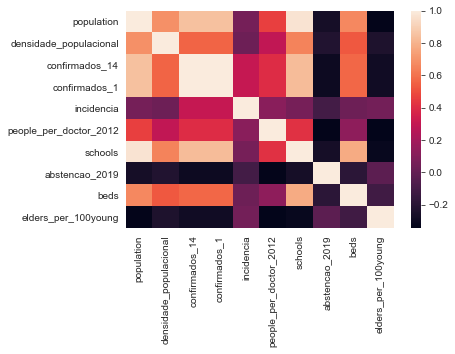

In [19]:
sns.heatmap(df.corr())

In [20]:
model = sm.OLS(y, X.astype(float)).fit()
predictions = model.predict(X.astype(float))

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             incidencia   R-squared (uncentered):                   0.704
Model:                            OLS   Adj. R-squared (uncentered):              0.699
Method:                 Least Squares   F-statistic:                              142.5
Date:                Wed, 03 Feb 2021   Prob (F-statistic):                    4.66e-77
Time:                        17:20:19   Log-Likelihood:                         -2502.1
No. Observations:                 305   AIC:                                      5014.
Df Residuals:                     300   BIC:                                      5033.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
population                -0.0031      0.001     -2.119      0.035      -0.006      -0.000
people_per_doctor_2012     1.6648      0.436      3.815      0.000       0.806       2.524
rendimento                -1.8489      3.414     -0.541      0.589      -8.568       4.870
abstencao_2019            21.7576      4.727      4.603      0.000      12.455      31.060
beds                       0.3535      0.229      1.542      0.124      -0.098       0.805
==============================================================================
Omnibus:                      150.058   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              888.242
Skew:                           1.974   Prob(JB):                    1.32e-193
Kurtosis:                      10.369   Cond. No.                     7.17e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
X = df[df['data']== '19-01-2021'][['elders_per_100young','people_per_doctor_2012', 'abstencao_2019']]
y= df[df['data']== '19-01-2021']['incidencia']
model = sm.OLS(y, X.astype(float)).fit()
predictions = model.predict(X.astype(float))
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             incidencia   R-squared (uncentered):                   0.718
Model:                            OLS   Adj. R-squared (uncentered):              0.715
Method:                 Least Squares   F-statistic:                              255.8
Date:                Wed, 03 Feb 2021   Prob (F-statistic):                    1.42e-82
Time:                        17:20:19   Log-Likelihood:                         -2494.8
No. Observations:                 305   AIC:                                      4996.
Df Residuals:                     302   BIC:                                      5007.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
elders_per_100young        2.0614      0.452      4.565      0.000       1.173       2.950
people_per_doctor_2012     1.2650      0.326      3.881      0.000       0.624       1.906
abstencao_2019            10.1685      3.288      3.092      0.002       3.697      16.640
==============================================================================
Omnibus:                      159.131   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1082.410
Skew:                           2.063   Prob(JB):                    9.07e-236
Kurtosis:                      11.255   Cond. No.                         27.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
X.merge(y, left_index=True, right_index = True)

,elders_per_100young,people_per_doctor_2012,abstencao_2019,incidencia
10,264.2,493.8,45.8,871.0
21,199.3,409.2,46.7,1508.0
32,300.5,255.2,51.4,6255.0
43,294.7,197.8,45.9,1903.0
54,166.3,396.8,46.3,1019.0
...,...,...,...,...
3310,334.1,163.0,59.3,994.0
3321,604.4,206.0,57.8,1123.0
3332,157.2,449.7,46.6,1646.0
3343,115.9,336.0,40.8,900.0


In [24]:
X

,elders_per_100young,people_per_doctor_2012,abstencao_2019
10,264.2,493.8,45.8
21,199.3,409.2,46.7
32,300.5,255.2,51.4
43,294.7,197.8,45.9
54,166.3,396.8,46.3
...,...,...,...
3310,334.1,163.0,59.3
3321,604.4,206.0,57.8
3332,157.2,449.7,46.6
3343,115.9,336.0,40.8


In [25]:
visualization_data = X.copy()

In [26]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


scaler = StandardScaler()
scaler = MinMaxScaler()

In [27]:
X = scaler.fit_transform(X)

In [28]:
X_embedded = TSNE(perplexity=18, n_components=2, n_jobs=-1).fit_transform(X)

x = X_embedded[:,0]
y =X_embedded[:,1]

In [29]:
z = df[df['data']== '19-01-2021'][['elders_per_100young','people_per_doctor_2012', 'abstencao_2019', 'incidencia_categoria']]
w = df[df['data'] == '19-01-2021']['population']


NameError: name 'ax' is not defined

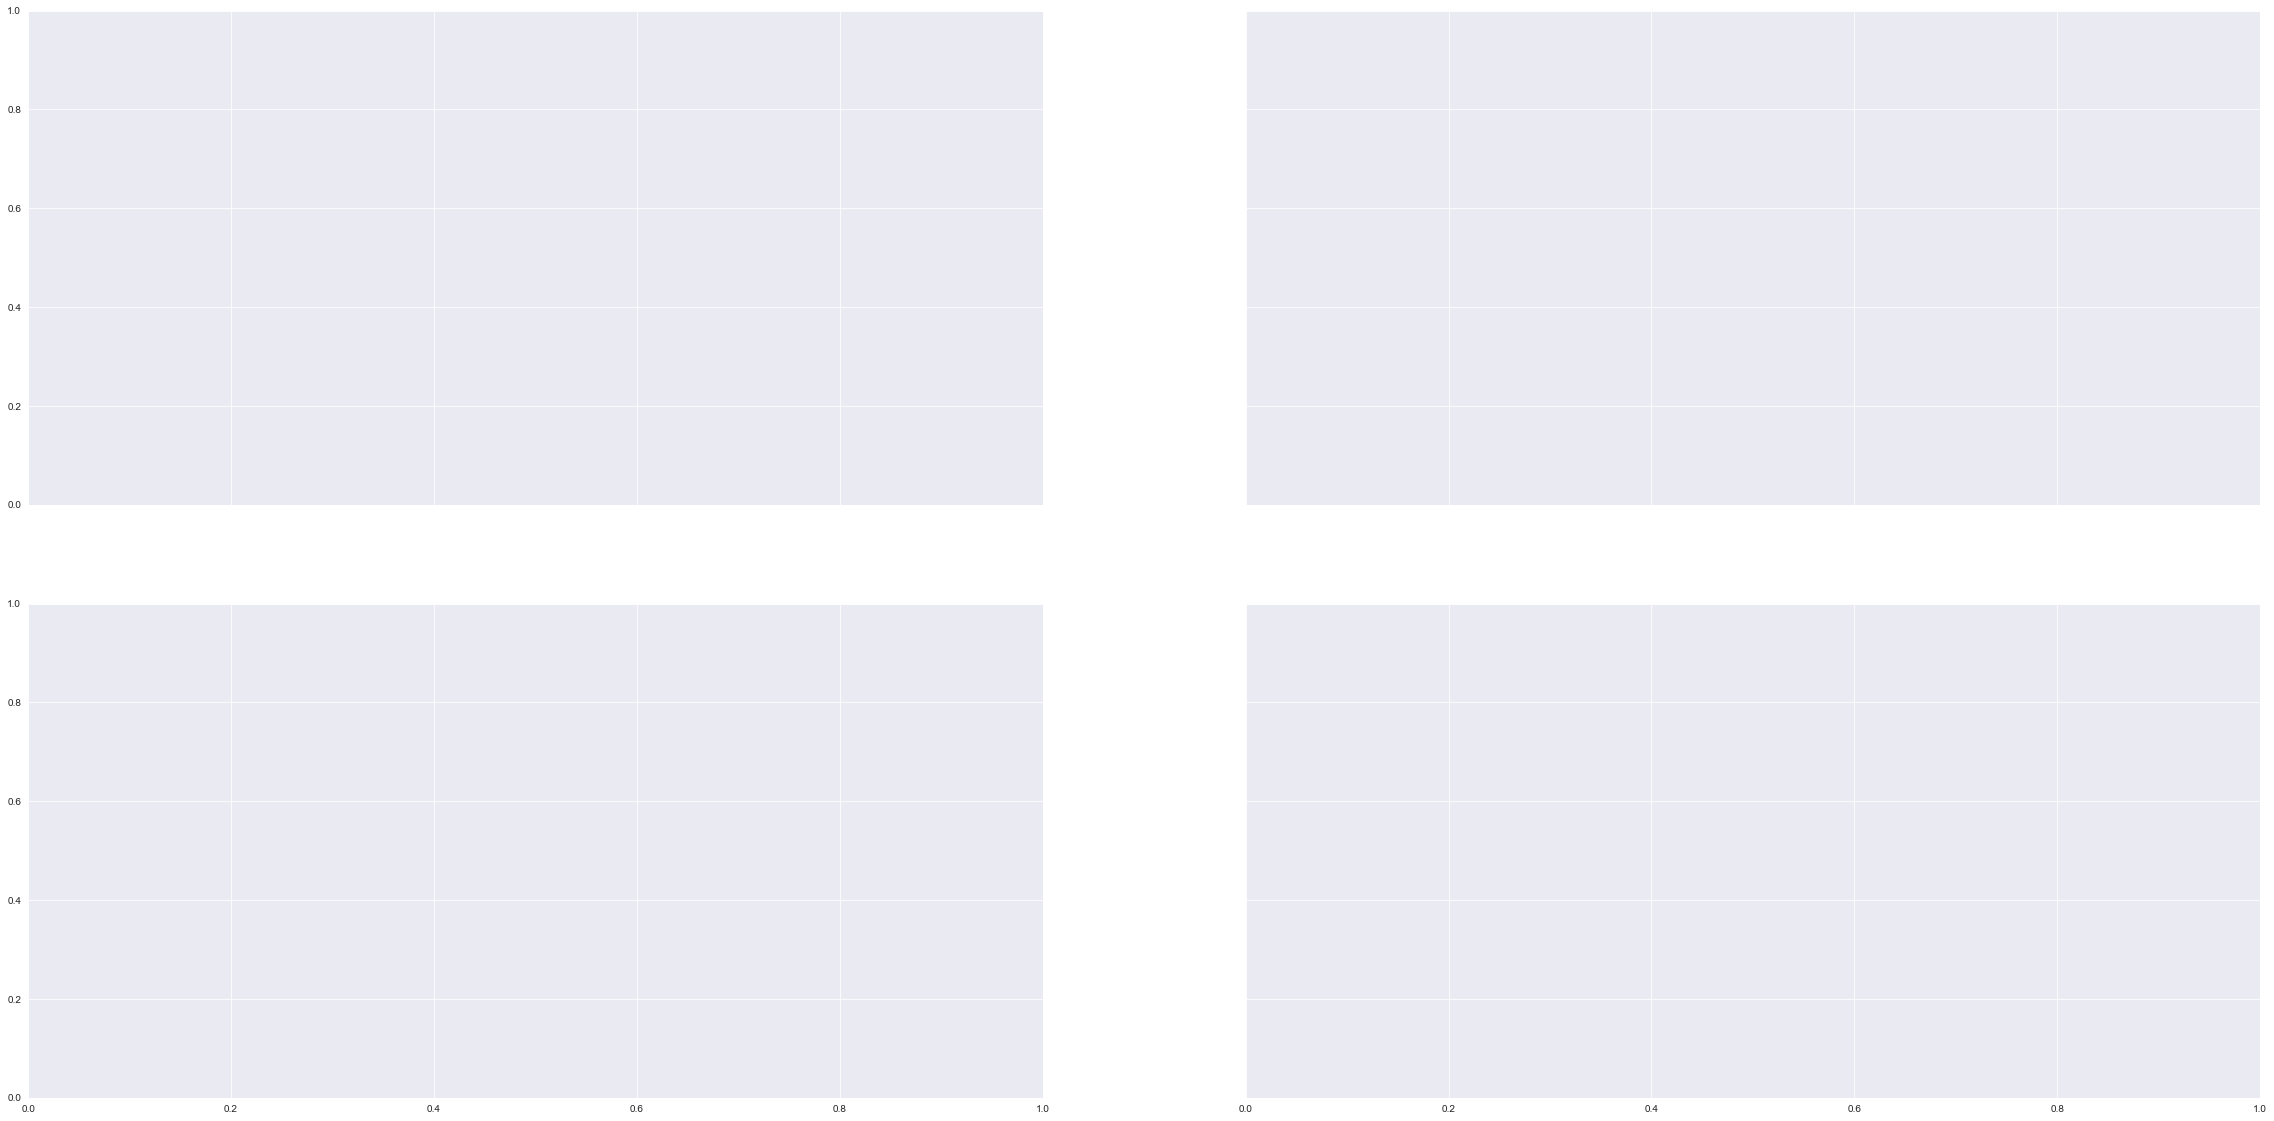

In [30]:
fig, axes = plt.subplots(2,2, sharex=True, sharey =True, figsize = (40,20))


ax


sns.scatterplot(x,y, size = w, hue = z.iloc[:,0], ax = axes[0,0], sizes = (100,1200), palette ='flare' )#, sizes = [320, 500, 180, 60])
sns.scatterplot(x,y, size = w, hue = z.iloc[:,1], ax = axes[0,1], sizes = (100,1200), palette ='flare' )#, sizes = [320, 500, 180, 60])
sns.scatterplot(x,y, size = w, hue = z.iloc[:,2], ax = axes[1,0], sizes = (100,1200), palette ='flare' )#, sizes = [320, 500, 180, 60])
sns.scatterplot(x,y, size = w, hue = z.iloc[:,3], ax = axes[1,1], sizes = (100,1200), palette ='flare' )#, sizes = [320, 600, 180, 60])

axes[0,0].legend(bbox_to_anchor=(1.0, 1.0), loc='upper left', markerscale = 0.3)
axes[0,1].legend(bbox_to_anchor=(1.0, 1.0), loc='upper left', markerscale = 0.3)
axes[1,0].legend(bbox_to_anchor=(1.0, 1.0), loc='upper left', markerscale = 0.3)
axes[1,1].legend(bbox_to_anchor=(1.0, 1.0), loc='upper left', markerscale = 0.3)

fig.show()

In [ ]:
fig.savefig('tsne_final.png', dpi = 300)

In [ ]:
fig, axes = plt.subplots(1,1, figsize = (10,15))

axes.tick_params(axis='x', colors='white')
axes.tick_params(axis='y', colors='white')

sns.scatterplot(x,y, size = z.iloc[:,3], hue = z.iloc[:,2], ax = axes, sizes = [320, 600, 180, 60])


fig.show()

In [ ]:
sns.scatterplot(x,y, hue = z.iloc[:,2] )

In [ ]:
sns.scatterplot(x,y, hue = z.iloc[:,3] )
fig.savefig('test_figure.png')

In [ ]:
import plotly.express as px
plotly.offline.init_notebook_mode(connected=True)
df = X
fig = px.scatter_3d(df)
fig.show()

In [ ]:
import re, seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# generate data
n = 200
x = visualization_data.iloc[:,0]
y = visualization_data.iloc[:,1]
z = visualization_data.iloc[:,2]

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(x, y, z, s=40, c=x, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
plt.savefig("scatter_hue", bbox_inches='tight')

In [ ]:
df['confirmados_1'].sum()

In [ ]:
df['confirmados_14'].sum()

In [ ]:
last_df = df[df['data'] = '05-01-2021'].groupby(by='concelho').agg({'confirmados_14':'sum'})

In [ ]:
last_df

In [ ]:
last_df.rename(columns= {'confirmados_1':'total'}, inplace =True)


In [ ]:
last_df.sum()

In [ ]:
df[data['data'] == '19-01-2021'][['concelho','population']]
data[data['data'] == '19-01-2021'][['concelho','population']]
data[data['data'] == '19-01-2021'][['concelho','confirmados_1']]


In [ ]:
last_df['population'] = [x for x in df[df['data'] == '19-01-2021']['population']]
last_df['active_cases'] = [x for x in df[df['data'] == '19-01-2021']['confirmados_14']]


In [ ]:
last_df['recovered'] = last_df['total'] -last_df['active_cases']

In [ ]:
last_df

In [ ]:
last_df.to_csv('covid_19_01_2021.csv')

In [ ]:
last_df.drop(columns = ['total'], inplace = True)

In [ ]:
last_df